## <font color = green> Classification Model - Built a model that classifies the side effects of a drug.

### <font color = blue>  Import the necessary Libraries & Load the dataset into python environment : 

In [1]:
from faker import Faker #Faker is a Python library that allows to generate fake data 
from random import choice, sample #for making random selections 

In [2]:
import numpy as np
import pandas as pd

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go

# Preprocessing the dataset:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split

# Classification algorithms:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Analysis of classificaiton algorithms:
from sklearn.metrics import accuracy_score

# Model Selection
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold

# Remove warnings:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\INTERNSHIP\webmd.csv') 

### <font color = blue> Perform Data Understanding:

In [4]:
# View first 10 rows of data

data.head(10)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,25-34,Acne,4/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0


In [5]:
# Dimension of dataset

data.shape

(362806, 12)

In [6]:
# Information about the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


### <font color = blue>  Create Name and Race columns :

In [7]:
fake = Faker()

# Generate fake names and races
data['Name'] = [fake.name() for _ in range(len(data))]
data['Race'] = [fake.random_element(elements=('White', 'Black', 'Asian', 'Hispanic')) for _ in range(len(data))]

In [8]:
# Rename the column
data = data.rename(columns={'Sides':'SideEffects'})

# Set the columns 'Name' and 'Race' as the first and second level
data = data.set_index(['Name', 'Race'])

# Reset the index to move 'Name' and 'Race' back to columns
data = data.reset_index()

In [9]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,SideEffects,UsefulCount
0,Jonathan Patel,Asian,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Kevin Peters,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Yolanda Rice,Hispanic,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,William Edwards,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Robert Palmer,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [10]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex',
       'SideEffects', 'UsefulCount'],
      dtype='object')

In [11]:
# Dimension of dataset

data.shape

(362806, 14)

In [12]:
# Information about the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  SideEffects    362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [13]:
# Summarize the data by generating descriptive statistics of numerical columns

data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [14]:
data.describe(include = object).transpose()

,count,unique,top,freq
Name,362806,180719,Michael Smith,174
Race,362806,4,Asian,90855
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250167,,41824
Sex,362806,3,Female,238226
SideEffects,362806,1651,,17460


### <font color = blue> Feature Description: 

In [15]:
# Number of numerical columns & Number of categorical columns in the DataFrame

numerical_columns = data.select_dtypes(include=['float', 'int']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Number of Categorical Columns: {len(categorical_columns)}")

Number of Numerical Columns: 5
Number of Categorical Columns: 9


1. Name (categorical): Name of patient
2. Race (categorical): Race of patient
3. Age (numerical): Age group range of patient
4. Condition (categorical): Condition/Symptom from which the patient is suffering
5. Date (temporal): Date of usage
6. Drug (categorical): Name of the drug
7. DrugId (numerical): Identity/code of the drug
8. EaseOfUse (numerical):  Patient's 5-Star rating on the ease of use of drug 
9. Effectiveness (numerical):Patient's 5-Star rating on the effectiveness of drug
10. Review (text): Patient's review
11. Satisfaction (numerical):  Patient's 5-Star rating on satisfaction
12. Sex (categorical): Gender of the patient
13. SideEffects (text): Side effects associated with drug (if any)
14. UsefulCount (numerical): Number of users who found review useful

## <font color = blue>  Exploratory Data Analysis:

### Unique values: 

In [16]:
# Iterate over the columns

for column in data.columns:
    # Get the unique values for the column
    unique_values = data[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-----------------------")

Column: Name
Unique Values: ['Jonathan Patel' 'Kevin Peters' 'Yolanda Rice' ... 'Jackie Hanson'
 'Katelyn Quinn' 'Derrick Hull']
-----------------------
Column: Race
Unique Values: ['Asian' 'Black' 'Hispanic' 'White']
-----------------------
Column: Age
Unique Values: ['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' ' ' '13-18'
 '7-12' '0-2' '3-6']
-----------------------
Column: Condition
Unique Values: ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance']
-----------------------
Column: Date
Unique Values: ['9/21/2014' '1/13/2011' '7/16/2012' ... '10/25/2019' '6/22/2019'
 '10/19/2019']
-----------------------
Column: Drug
Unique Values: ['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' ...
 'chest congestion relief dm' 'chantix' 'chateal']
-----------------------
Column: DrugId
Unique Values: [146724 144731 163180 ...  94947 144470 163265]
-----------------------
Column: Eas

### Counts of unique values:

In [17]:
print('Name',data['Name'].nunique())
print('Race',data['Race'].nunique())
print('Age',data['Age'].nunique())
print('Condition',data['Condition'].nunique())
print('Date',data['Date'].nunique())
print('Drug',data['Drug'].nunique())
print('DrugId',data['DrugId'].nunique())
print('EaseofUse',data['EaseofUse'].nunique())
print('Effectiveness',data['Effectiveness'].nunique())
print('Reviews',data['Reviews'].nunique())
print('Satisfaction',data['Satisfaction'].nunique())
print('Sex',data['Sex'].nunique())
print('SideEffects',data['SideEffects'].nunique())
print('UsefulCount',data['UsefulCount'].nunique())

Name 180719
Race 4
Age 12
Condition 1806
Date 4524
Drug 7093
DrugId 6572
EaseofUse 7
Effectiveness 7
Reviews 250167
Satisfaction 7
Sex 3
SideEffects 1651
UsefulCount 148


In [18]:
#creating a copy
df = data.copy()

In [19]:
# Define custom order for 'Age'
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

# Group by 'Age' and find the most common drug in each age group
most_used_drug_by_age = df.groupby('Age')['Drug'].agg(lambda x: x.value_counts().idxmax()).reindex(age_order)

print(most_used_drug_by_age)

Age
0-2                             cefdinir
3-6                              vyvanse
7-12                             vyvanse
13-18                            lexapro
19-24         mirena intrauterine device
25-34                            lexapro
35-44                           cymbalta
45-54                           cymbalta
55-64                lisinopril solution
65-74                lisinopril solution
75 or over           lisinopril solution
Name: Drug, dtype: object


### Visualization: 

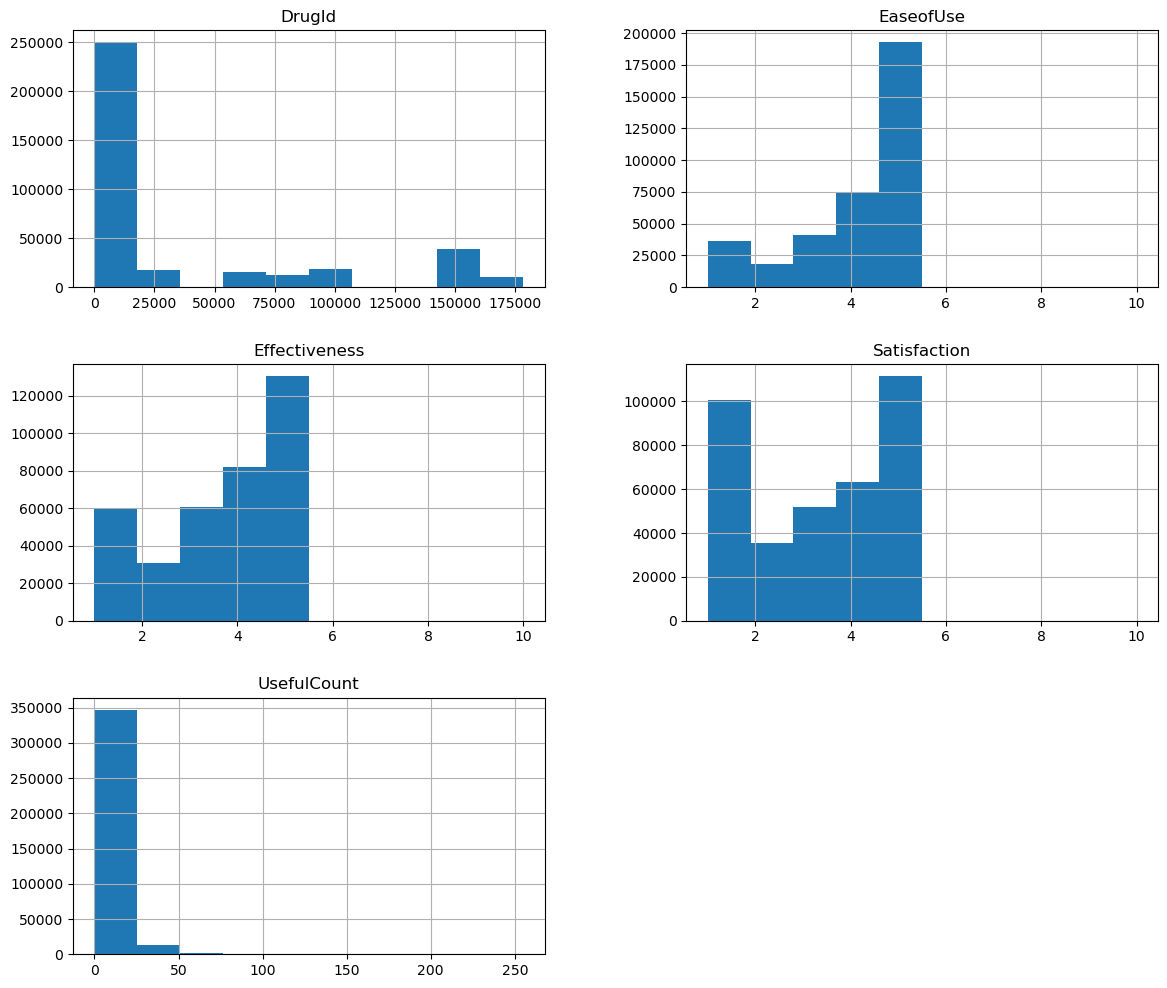

In [20]:
# Frequency Distribution of Numeric Columns:

freqgraph = data.select_dtypes(include=['float' , 'int'])
freqgraph.hist(figsize=(14,12))
plt.show()

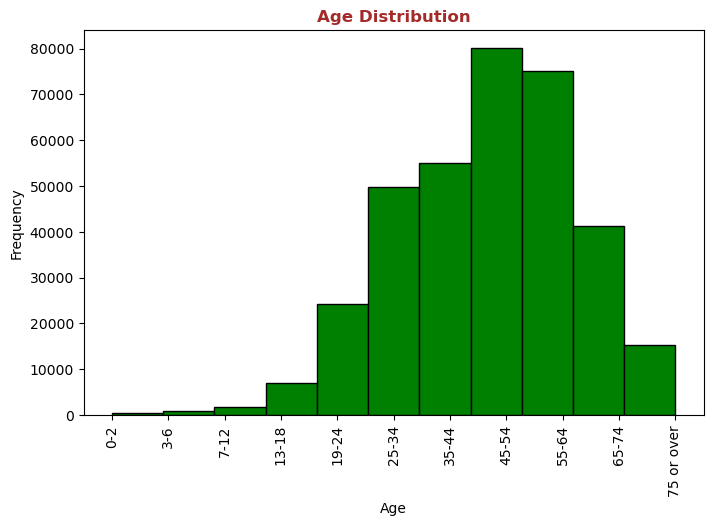

In [21]:
# Define the desired order of age categories
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

# Convert 'Age' column to categorical with desired order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Map age categories to numeric values
age_numeric = df['Age'].map({category: i for i, category in enumerate(age_order)})

plt.figure(figsize=(8, 5))

# Create histogram
plt.hist(age_numeric, bins=len(age_order), color='green',edgecolor='black')

# Set x-axis tick labels
plt.xticks(range(len(age_order)), age_order,rotation=90)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution',color='brown', fontweight='bold')

# Show the plot
plt.show() 

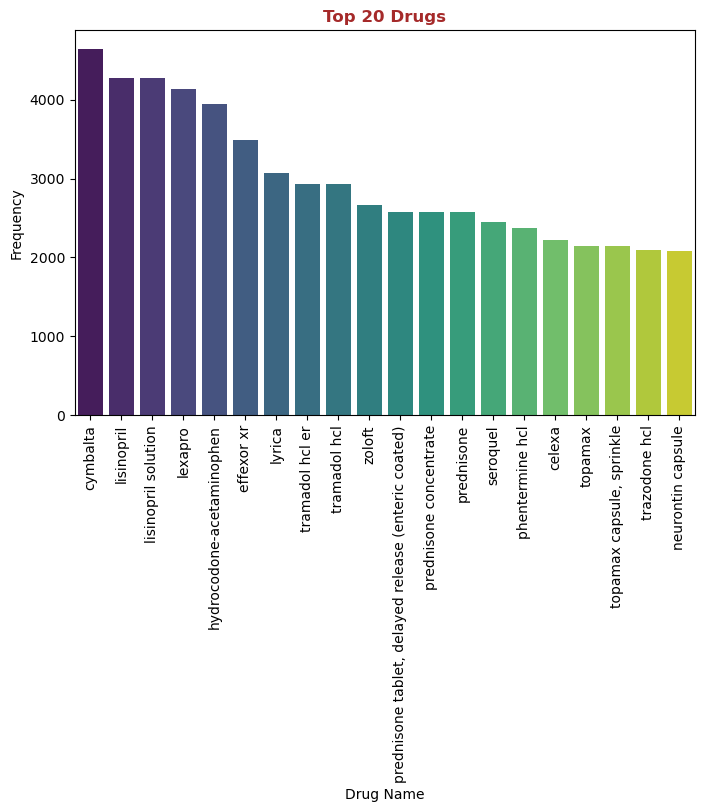

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=data['Drug'].value_counts().head(20).index, y=data['Drug'].value_counts().head(20), palette='viridis')

# Add title and labels
plt.title('Top 20 Drugs',color='brown', fontweight='bold')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Show the plot
plt.show()

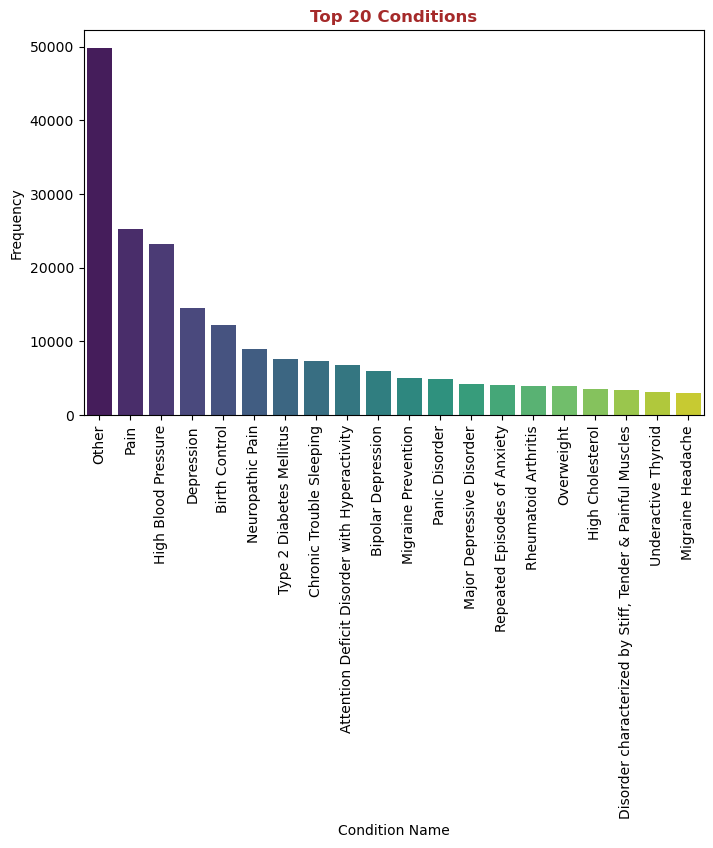

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=data['Condition'].value_counts().head(20).index, 
            y=data['Condition'].value_counts().head(20).values, 
            palette='viridis')

# Add title and labels
plt.title('Top 20 Conditions',color='brown', fontweight='bold')
plt.xlabel('Condition Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 

# Show the plot
plt.show()

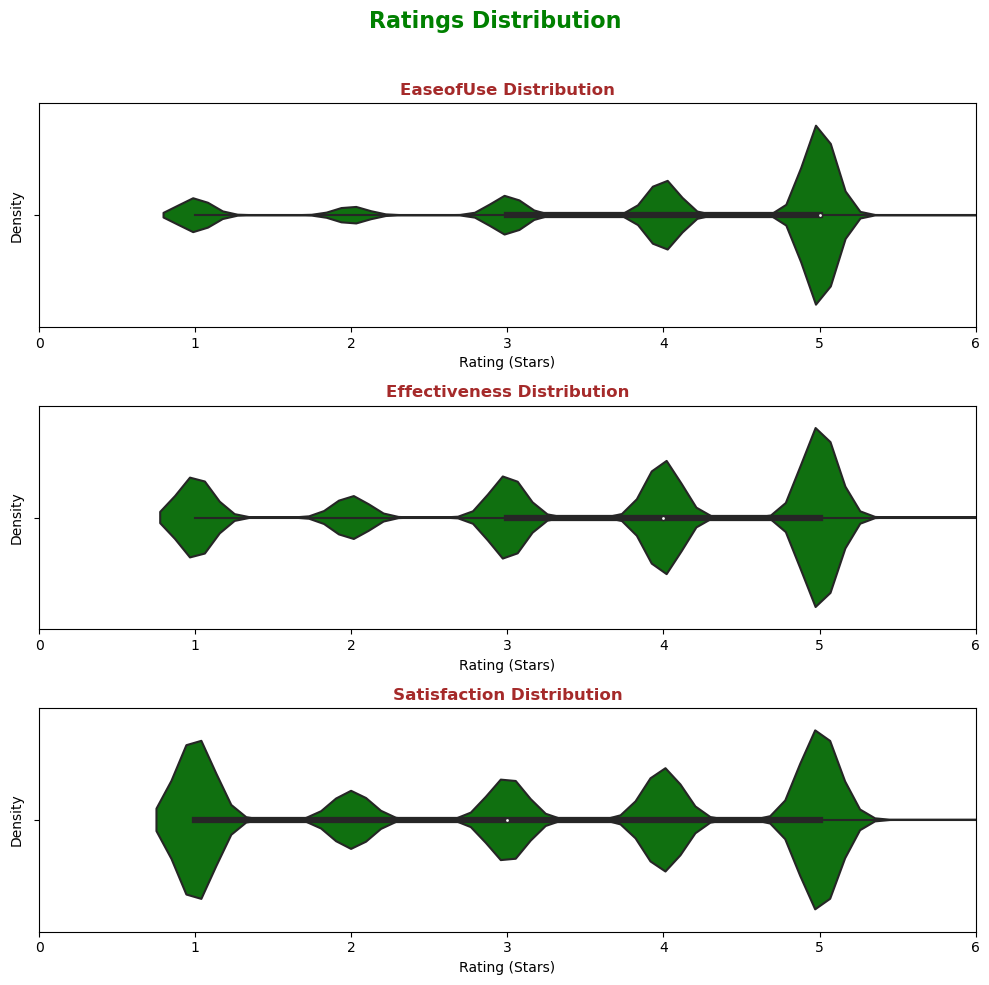

In [24]:
ratings = [1, 2, 3, 4, 5, 6, 10]

# Create subplots without a shared x-axis
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Create violin plots for 'Ease of Use', 'Effectiveness', and 'Satisfaction'
for ax, column_name in zip(axs, ['EaseofUse', 'Effectiveness', 'Satisfaction']):
    sns.violinplot(x=data[column_name], ax=ax, color='green')
    ax.set_ylabel('Density')
    ax.set_title(f'{column_name} Distribution',color='brown', fontweight='bold')
    
    # Set individual x-axis limits
    ax.set_xlim(0, 6)

    # Set individual x-axis labels
    ax.set_xlabel('Rating (Stars)')

# Set the main title
plt.suptitle('Ratings Distribution', fontsize=16, color='green', fontweight='bold')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show() 

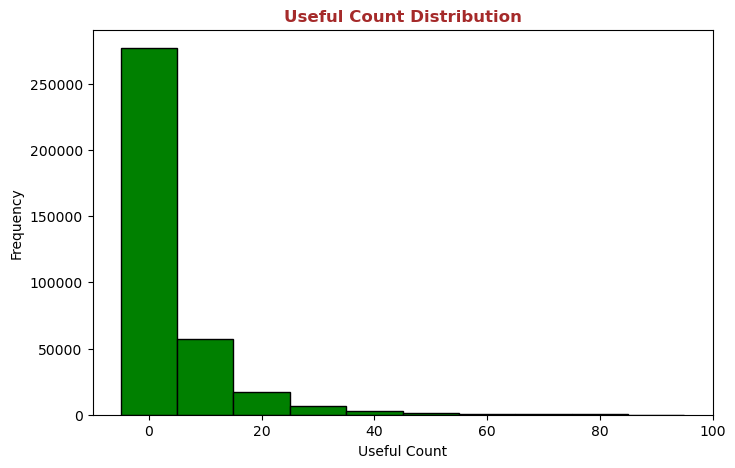

In [25]:
bin_edges = np.arange(0, 101, 10)

# Count the number of counts falling into each bin
bin_counts, _ = np.histogram(data['UsefulCount'], bins=bin_edges)
plt.figure(figsize=(8, 5))

# Create bar plot
plt.bar(bin_edges[:-1], bin_counts, width=10, color='green', edgecolor='black')

# Add title and labels
plt.title('Useful Count Distribution',color='brown', fontweight='bold')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

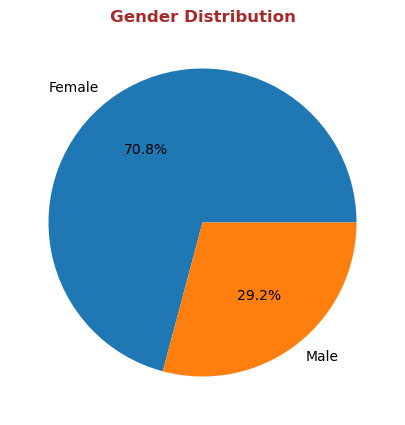

In [26]:
# Filter out the empty string from 'Sex'
gender_counts = df[df['Sex'].isin(['Male', 'Female'])]['Sex'].value_counts()
plt.figure(figsize=(8,5))

# Create pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Set title
plt.title('Gender Distribution',color='brown', fontweight='bold')
plt.show()

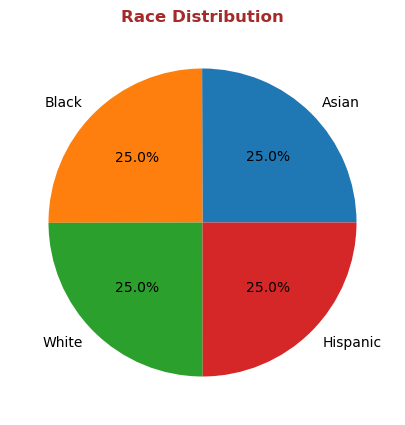

In [27]:
race_counts = data['Race'].value_counts()

plt.figure(figsize=(8, 5))

# Create pie chart
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')

# Set title
plt.title('Race Distribution',color='brown', fontweight='bold')

# Show the pie chart
plt.show()

#### Satisfaction levels of top 10 drugs:

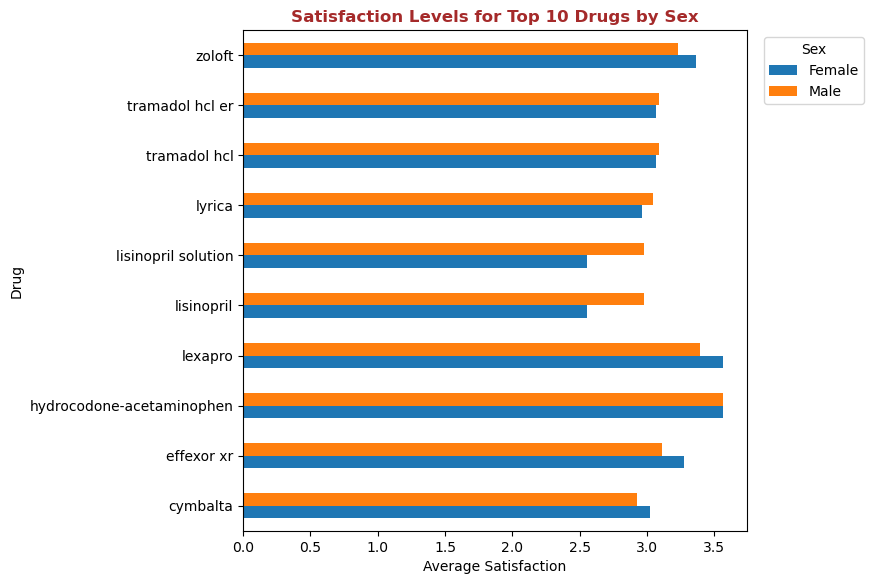

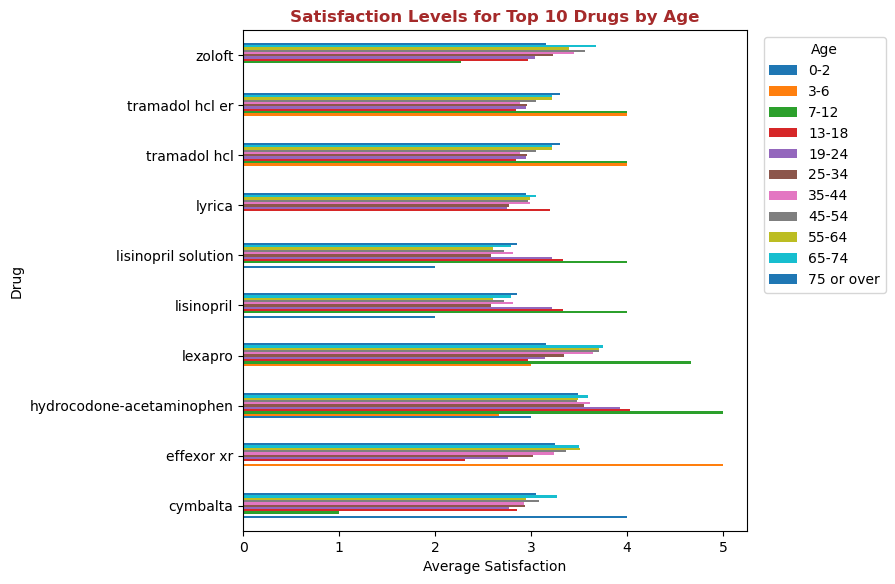

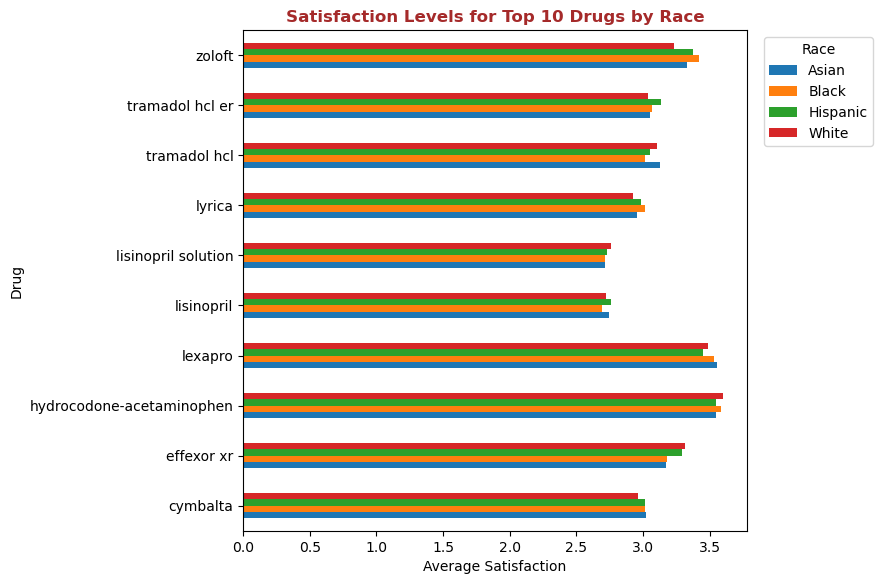

In [28]:
# Define custom order for 'Sex'
sex_order = ['Female', 'Male']

# Define custom order for 'Age'
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

# Convert 'Age' column to categorical with desired order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Map age categories to numeric values
age_numeric = df['Age'].cat.codes

# Calculate the frequency of each drug
drug_frequency = df['Drug'].value_counts()

# Select the top 10 drugs based on frequency
top_10_drugs = drug_frequency.head(10).index

# Filter the dfFrame to include only the top 10 drugs
filtered_df = df[df['Drug'].isin(top_10_drugs)]

# Define the parameters for plotting
parameters = [('Sex', 'Satisfaction', 'Satisfaction Levels for Top 10 Drugs by Sex', 'Sex', sex_order),
              ('Age', 'Satisfaction', 'Satisfaction Levels for Top 10 Drugs by Age', 'Age', age_order),
             ('Race', 'Satisfaction', 'Satisfaction Levels for Top 10 Drugs by Race', 'Race',None)]

# Iterate over the parameters and generate the plots
for param, ylabel, title, legend_title, custom_order in parameters:
    # Group the filtered df by 'Drug' and the current parameter, and calculate the average satisfaction
    grouped_df = filtered_df.groupby(['Drug', param])['Satisfaction'].mean().unstack()

    # Arrange the df based on custom order
    grouped_df = grouped_df.reindex(columns=custom_order)

    # Plot the grouped horizontal bar plot
    grouped_df.plot(kind='barh', figsize=(6.5,6.5))

    # Set the title and labels
    plt.title(title,color='brown', fontweight='bold')
    plt.xlabel('Average Satisfaction')
    plt.ylabel('Drug')

    # Add a legend
    plt.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1.02, 1))

    # Show the plot
    plt.show()

#### Effectiveness levels of top 10 drugs:

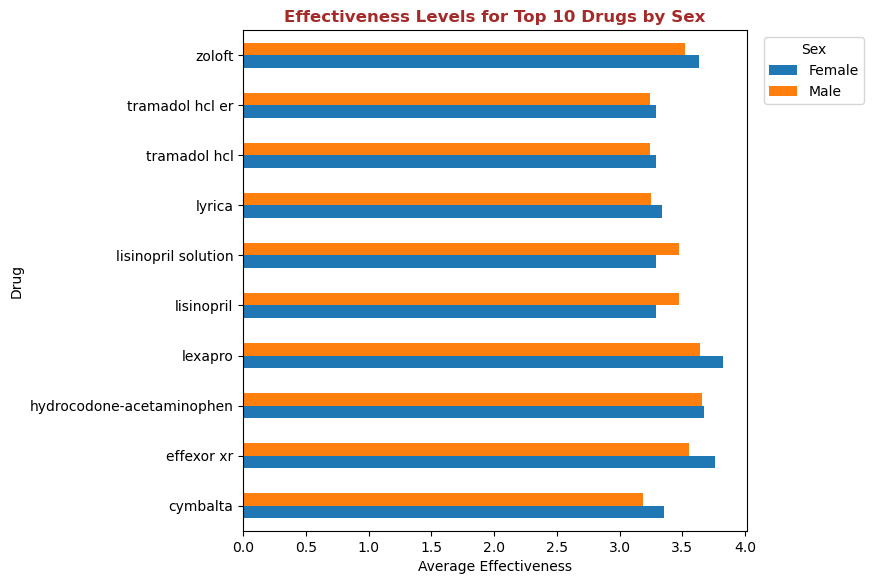

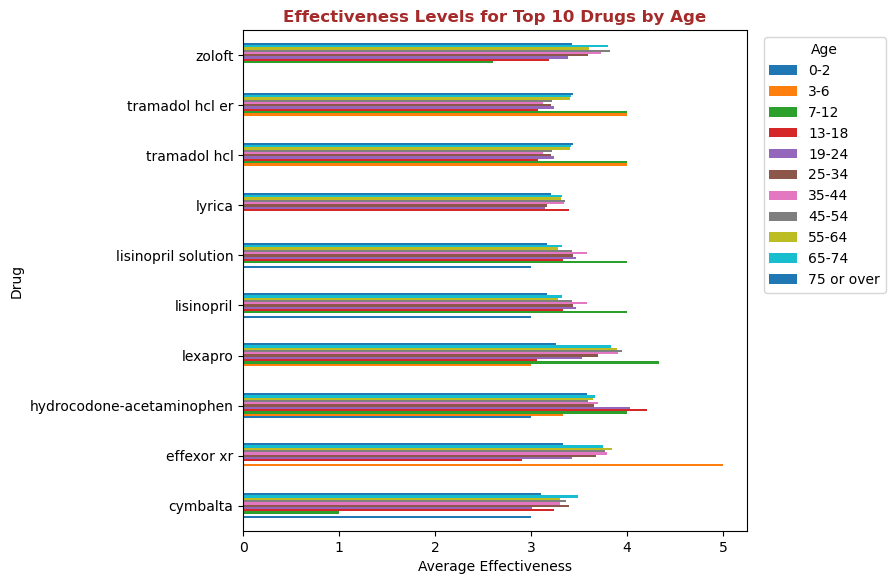

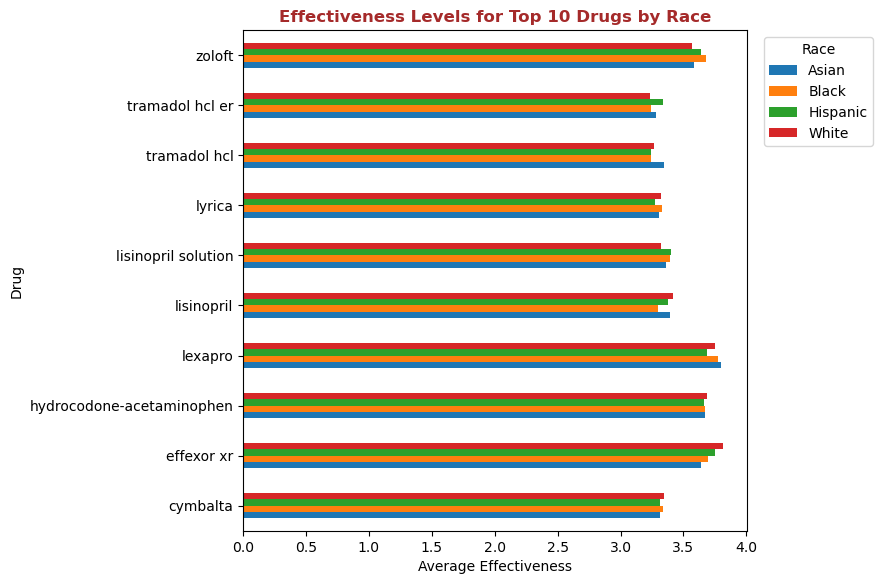

In [29]:
# Define custom order for 'Sex'
sex_order = ['Female', 'Male']

# Define custom order for 'Age'
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

# Convert 'Age' column to categorical with desired order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Map age categories to numeric values
age_numeric = df['Age'].cat.codes

# Calculate the frequency of each drug
drug_frequency = df['Drug'].value_counts()

# Select the top 10 drugs based on frequency
top_10_drugs = drug_frequency.head(10).index

# Filter the dfFrame to include only the top 10 drugs
filtered_df = df[df['Drug'].isin(top_10_drugs)]

# Define the parameters for plotting
parameters = [('Sex', 'Effectiveness', 'Effectiveness Levels for Top 10 Drugs by Sex', 'Sex', sex_order),
              ('Age', 'Effectiveness', 'Effectiveness Levels for Top 10 Drugs by Age', 'Age', age_order),
              ('Race', 'Effectiveness', 'Effectiveness Levels for Top 10 Drugs by Race', 'Race', None)]

# Iterate over the parameters and generate the plots
for param, ylabel, title, legend_title, custom_order in parameters:
    # Group the filtered df by 'Drug' and the current parameter, and calculate the average Effectiveness
    grouped_df = filtered_df.groupby(['Drug', param])['Effectiveness'].mean().unstack()

    # If there is a custom order, arrange the df based on it
    if custom_order is not None:
        grouped_df = grouped_df.reindex(columns=custom_order)

    # Plot the grouped horizontal bar plot
    grouped_df.plot(kind='barh', figsize=(6.5, 6.5))

    # Set the title and labels
    plt.title(title,color='brown', fontweight='bold')
    plt.xlabel('Average Effectiveness')
    plt.ylabel('Drug')

    # Add a legend
    plt.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1.02, 1))

    # Show the plot
    plt.show()


#### Ease of use of top 10 drugs:

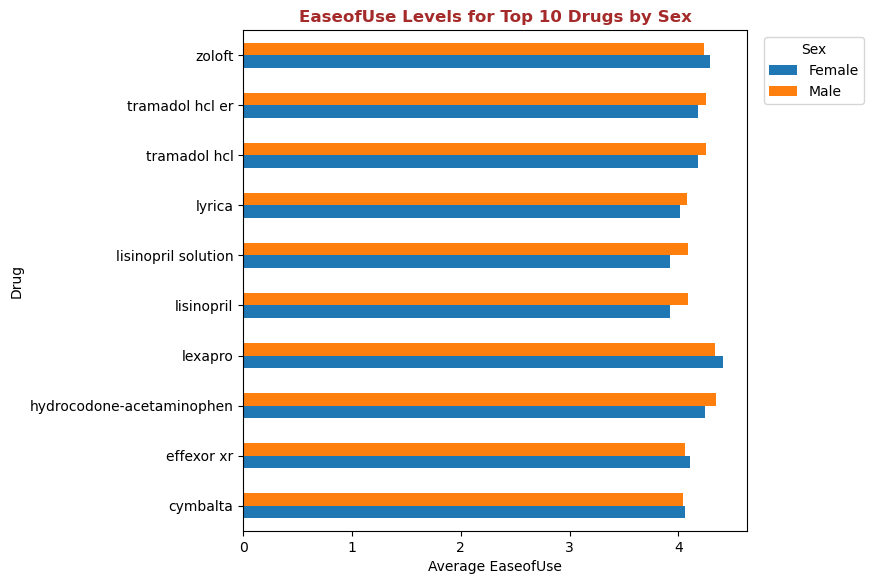

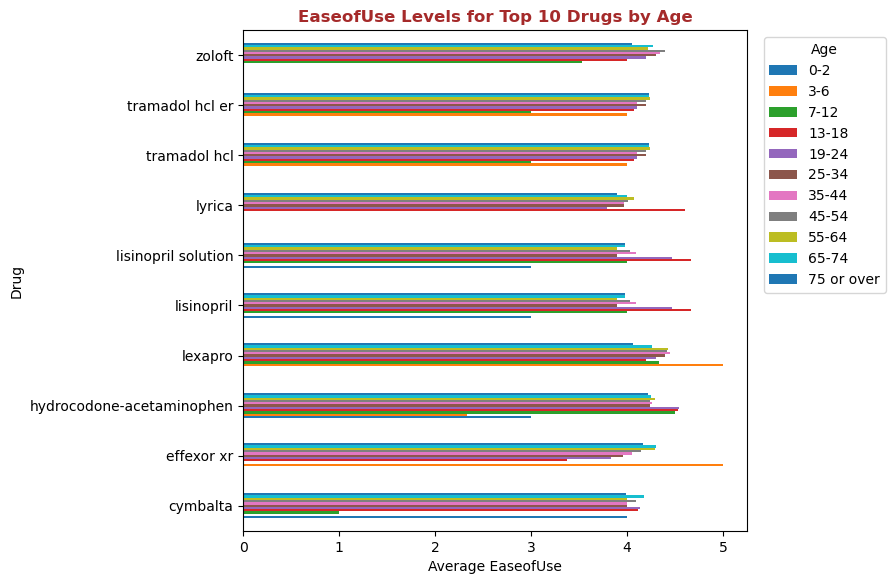

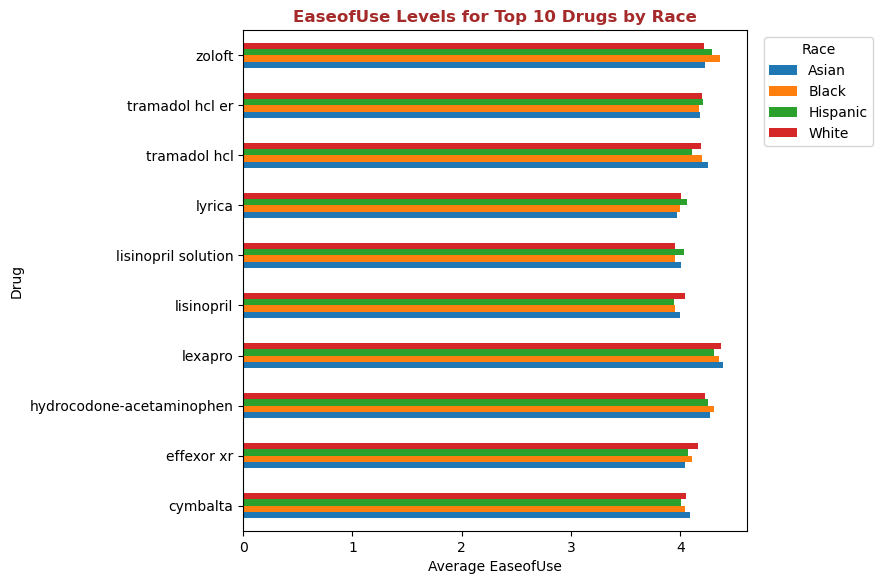

In [30]:
# Define custom order for 'Sex'
sex_order = ['Female', 'Male']

# Define custom order for 'Age'
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

# Convert 'Age' column to categorical with desired order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Map age categories to numeric values
age_numeric = df['Age'].cat.codes

# Calculate the frequency of each drug
drug_frequency = df['Drug'].value_counts()

# Select the top 10 drugs based on frequency
top_10_drugs = drug_frequency.head(10).index

# Filter the dfFrame to include only the top 10 drugs
filtered_df = df[df['Drug'].isin(top_10_drugs)]

# Define the parameters for plotting
parameters = [('Sex', 'EaseofUse', 'EaseofUse Levels for Top 10 Drugs by Sex', 'Sex', sex_order),
              ('Age', 'EaseofUse', 'EaseofUse Levels for Top 10 Drugs by Age', 'Age', age_order),
              ('Race', 'EaseofUse', 'EaseofUse Levels for Top 10 Drugs by Race', 'Race', None)]

# Iterate over the parameters and generate the plots
for param, ylabel, title, legend_title, custom_order in parameters:
    # Group the filtered df by 'Drug' and the current parameter, and calculate the average EaseofUse
    grouped_df = filtered_df.groupby(['Drug', param])['EaseofUse'].mean().unstack()

    # If there is a custom order, arrange the df based on it
    if custom_order is not None:
        grouped_df = grouped_df.reindex(columns=custom_order)

    # Plot the grouped horizontal bar plot
    grouped_df.plot(kind='barh', figsize=(6.5, 6.5))

    # Set the title and labels
    plt.title(title,color='brown', fontweight='bold')
    plt.xlabel('Average EaseofUse')
    plt.ylabel('Drug')

    # Add a legend
    plt.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1.02, 1))

    # Show the plot
    plt.show()


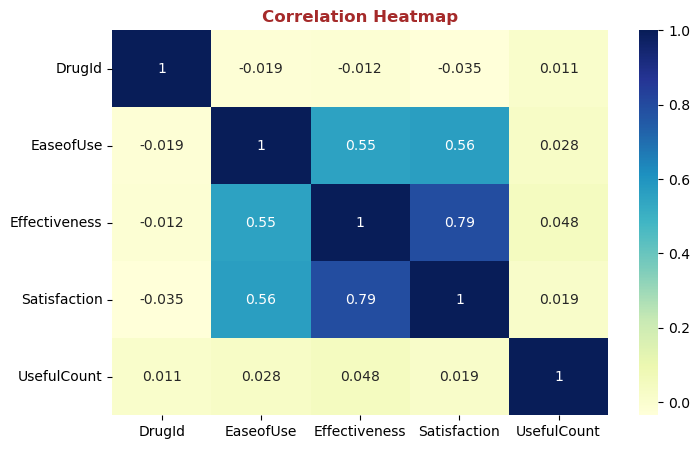

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap = 'YlGnBu')

plt.title("Correlation Heatmap",color='brown', fontweight='bold')
plt.show()

## <font color = blue>Data Preprocessing:

### <font color = blue>Data Cleaning:

###  Missing Value Handling:

In [32]:
# Check for missing values:

data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
SideEffects       0
UsefulCount       0
dtype: int64

In [33]:
# Filling the missing values in the "Reviews" column of the dataset with the mode value of the column:

for col in ['Reviews']:
    data[col]=data[col].fillna(data[col].mode()[0])

In [34]:
# Check for missing values:

data.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
SideEffects      0
UsefulCount      0
dtype: int64

### Handle 'Age'  , 'Condition' ,  'Sex' Columns: 

In [35]:
columns_to_fill = ['Age' ,'Condition','Sex']

for column in columns_to_fill:
    mode_value = data[column].mode()[0]  # Get the mode for the column
    data[column] = data[column].replace(' ', mode_value)

In [36]:
# List of columns to find unique values
columns_to_find_unique = ['Age' ,'Condition','Sex']

for column in columns_to_find_unique:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-----------------------")

Column: Age
Unique Values: ['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' '13-18'
 '7-12' '0-2' '3-6']
-----------------------
Column: Condition
Unique Values: ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance']
-----------------------
Column: Sex
Unique Values: ['Male' 'Female']
-----------------------


### Outlier Handling:

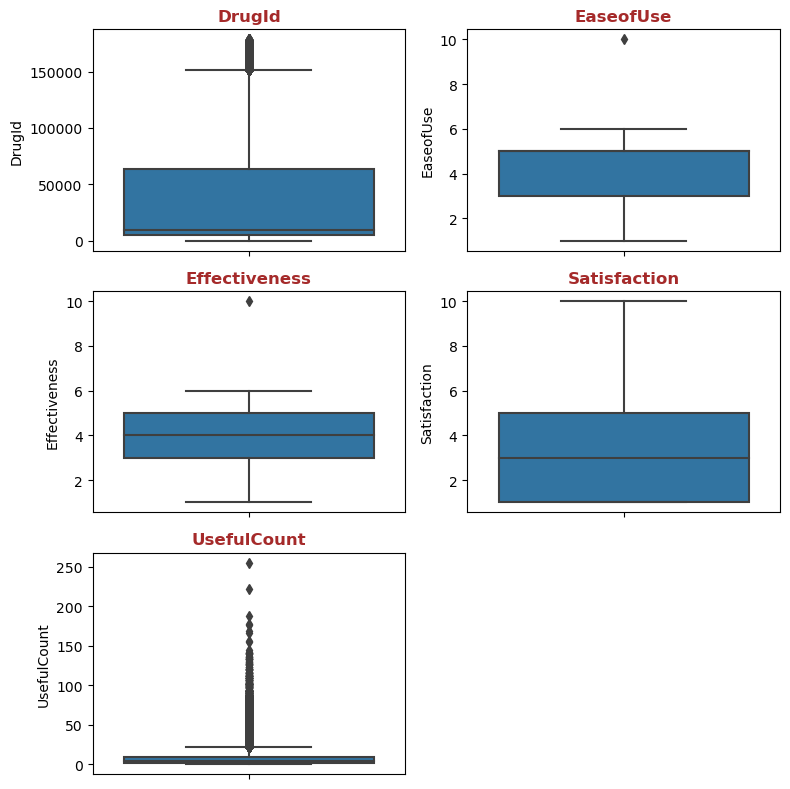

In [37]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_cols.columns)
num_rows = int(np.ceil(num_cols / 2))

# Create a figure and axis for subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 8))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over each numeric column and create a box plot
for i, column in enumerate(numeric_cols.columns):
    sns.boxplot(y=numeric_cols[column], ax=axs[i])
    axs[i].set_title(column,color='brown', fontweight='bold')

# Hide empty subplots if there are an odd number of plots
if num_cols % 2 != 0:
    axs[-1].axis('off')

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()